In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Test on one log

In [2]:
file = "traffic_fines_0"

In [3]:
with open('../results/'+file+'.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

dataprep_settings = dataset['dataprep_settings']
inf_train = dataset['Inference_train']
inf_test = dataset['Inference_test']
event_log = dataset['log']

In [4]:
inf_test.head()

,SEQID,caseid,num_events,prefix_number,event_number,prefixes,prefixwindow,prefix_date,distinct_events,caseduration_days,y
4,2_1,2,5,1,2,4,20,2007-07-17 00:00:00,5,550,47520000.0
5,2_2,2,5,2,3,4,20,2007-08-02 00:00:00,5,550,36288000.0
6,2_3,2,5,3,4,4,20,2007-10-01 00:00:00,5,550,34905600.0
7,2_4,2,5,4,5,4,20,2008-09-09 00:00:00,5,550,29721600.0
8,3_1,3,6,1,2,5,20,2007-07-17 00:00:00,6,189,16329600.0


In [5]:
dataprep_settings

{'data': 'traffic_fines',
 'dataprep_id': 'traffic_fines_0',
 'inference_tables': True,
 'last_state': True,
 'n_traces': 1000000000000000,
 'max_prefix_length': 20,
 'min_prefix_length': 3,
 'split_mode': 'case',
 'train_ratio': 0.5,
 'generate_case_features': True,
 'cat_features': ['dismissal',
  'vehicleClass',
  'article',
  'notificationType',
  'lastSent',
  'matricola'],
 'num_features': ['amount',
  'totalPaymentAmount',
  'points',
  'expense',
  'paymentAmount'],
 'standardize': True,
 'padding': 'leading',
 'trace_window_position': 'last_k',
 'drop_last_event': True,
 'onehot_time_features': True,
 'verbose': True,
 'event': ['1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9']}

In [6]:
len(set(event_log.id))

150370

In [7]:
#event_log["day"] = pd.to_datetime(eventlog["time"])
event_log.head(12)

,id,event,time,resource,activity_no,dismissal,vehicleClass,article,notificationType,lastSent,matricola,amount,totalPaymentAmount,points,expense,paymentAmount
0,0,Create Fine,2006-07-24 00:00:00,561.0,0,NIL,A,157.0,NaN,NaN,NaN,35.0,0.0,0.0,NaN,NaN
1,0,Send Fine,2006-12-05 00:00:00,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN
2,1,Create Fine,2006-08-02 00:00:00,561.0,0,NIL,A,157.0,NaN,NaN,NaN,35.0,0.0,0.0,NaN,NaN
3,1,Send Fine,2006-12-12 00:00:00,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN
4,1,Insert Fine Notification,2007-01-15 00:00:00,NaN,2,NaN,NaN,NaN,P,P,NaN,NaN,NaN,NaN,NaN,NaN
5,1,Add penalty,2007-03-16 00:00:00,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,71.5,NaN,NaN,NaN,NaN
6,1,Send for Credit Collection,2009-03-30 00:00:00,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,Create Fine,2007-03-09 00:00:00,561.0,0,NIL,A,157.0,NaN,NaN,NaN,36.0,0.0,0.0,NaN,NaN
8,2,Send Fine,2007-07-17 00:00:00,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN
9,2,Insert Fine Notification,2007-08-02 00:00:00,NaN,2,NaN,NaN,NaN,P,P,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
event_log["time"] = pd.to_datetime(event_log["time"])
event_log = event_log.sort_values("time")
event_log.head(12)

,id,event,time,resource,activity_no,dismissal,vehicleClass,article,notificationType,lastSent,matricola,amount,totalPaymentAmount,points,expense,paymentAmount
429367,117489,Create Fine,2000-01-01,18.0,0,NIL,A,158.0,NaN,NaN,NaN,62.59,0.0,0.0,NaN,NaN
431898,118127,Create Fine,2000-01-02,704.0,0,NIL,A,158.0,NaN,NaN,NaN,62.59,0.0,0.0,NaN,NaN
436195,119177,Create Fine,2000-01-02,35.0,0,NIL,A,158.0,NaN,NaN,NaN,31.30,0.0,0.0,NaN,NaN
436201,119178,Create Fine,2000-01-02,35.0,0,NIL,A,158.0,NaN,NaN,NaN,31.30,0.0,0.0,NaN,NaN
436206,119179,Create Fine,2000-01-02,35.0,0,NIL,A,158.0,NaN,NaN,NaN,31.30,0.0,0.0,NaN,NaN
109216,30304,Create Fine,2000-01-03,548.0,0,NIL,A,7.0,NaN,NaN,NaN,18.78,0.0,0.0,NaN,NaN
434410,118739,Create Fine,2000-01-03,31.0,0,NIL,A,7.0,NaN,NaN,NaN,31.30,0.0,0.0,NaN,NaN
434405,118738,Create Fine,2000-01-03,31.0,0,NIL,A,158.0,NaN,NaN,NaN,62.59,0.0,0.0,NaN,NaN
435626,119036,Create Fine,2000-01-03,32.0,0,NIL,A,7.0,NaN,NaN,NaN,31.30,0.0,0.0,NaN,NaN
431977,118146,Create Fine,2000-01-03,36.0,0,NIL,A,158.0,NaN,NaN,NaN,31.30,0.0,0.0,NaN,NaN


In [9]:
unique = event_log.drop_duplicates(subset='id', keep="first")


cases = unique.groupby('time').id.nunique()
cases = pd.DataFrame(cases)
cases["time"] = cases.index
cases.index = list(range(0,len(cases)))

np.sum(cases.id)

150370

In [10]:
cases

,id,time
0,1,2000-01-01
1,4,2000-01-02
2,38,2000-01-03
3,44,2000-01-04
4,60,2000-01-05
...,...,...
4814,6,2013-06-14
4815,6,2013-06-15
4816,1,2013-06-16
4817,4,2013-06-17


In [11]:
len(set(inf_train.caseid))

40988

In [12]:
len(set(inf_test.caseid))

30203

# Generate log stats

In [13]:
def dataset_profiling(file):
    
    import pandas as pd
    import pickle
    import numpy as np
    
    """
    load data
    """
    with open('../results/'+file+'_0.pickle', 'rb') as handle:
        dataset = pickle.load(handle)
    
    print(file)
    
    dataprep_settings = dataset['dataprep_settings']
    inf_train = dataset['Inference_train']
    inf_test = dataset['Inference_test']
    event_log = dataset['log']
    
    """
    formats
    """
    event_log["time"] = pd.to_datetime(event_log["time"])
    
    """
    Statistics: raw data
    """
    
    def calculate_case_metrics_raw(event_log):
        # Number of cases
        n_cases = len(set(event_log.id))
        
        # Max trace length of raw event log
        trace_lengths=[]
        case_durations=[]
        
        for i in set(event_log.id):
            sub = event_log.loc[event_log.id == i]
            sub.index = list(range(0,len(sub)))
            trace_lengths.append(len(sub))
            
            start_time = sub.loc[0]["time"]
            end_time = sub.loc[len(sub)-1]["time"]
            
            duration_days = (end_time - start_time).days
            case_durations.append(duration_days)
            
        max_trace_length = np.max(trace_lengths)
        avg_trace_length = np.mean(trace_lengths)
        
        # Average case duration
        avg_case_duration = np.mean(case_durations)
        return n_cases, max_trace_length, avg_trace_length, avg_case_duration
    
    # calculate for raw
    n_cases, max_trace_length, avg_trace_length, avg_case_duration = calculate_case_metrics_raw(event_log)
    
    """
    Statistics: processed data
    """
    
    def calculate_case_metrics(event_log):
        # Number of cases
        n_cases = len(set(event_log.caseid))
        
        # Max trace length of raw event log
        trace_lengths=[]
        case_durations=[]
        
        for i in set(event_log.caseid):
            sub = event_log.loc[event_log.caseid == i]
            sub.index = list(range(0,len(sub)))
            trace_lengths.append(len(sub))
                        
            duration_days = sub.loc[len(sub)-1]["caseduration_days"]
            case_durations.append(duration_days)
            
        max_trace_length = np.max(trace_lengths)
        avg_trace_length = np.mean(trace_lengths)
        
        # Average case duration
        avg_case_duration = np.mean(case_durations)
        return n_cases, max_trace_length, avg_trace_length, avg_case_duration
    
    # Truncation
    truncation_length = dataprep_settings["max_prefix_length"]
    
    train_n_cases, train_max_trace_length, train_avg_trace_length, train_avg_case_duration = calculate_case_metrics(inf_train)
    test_n_cases, test_max_trace_length, test_avg_trace_length, test_avg_case_duration = calculate_case_metrics(inf_test)
    
    dropped_due_to_censoring = n_cases - (train_n_cases + test_n_cases)
    
    """
    collecting all metrics into one table
    """
    
    # Collect metrics in table
    metrics = {"raw_n_cases":n_cases,
               "raw_max_trace_length":max_trace_length,
               "raw_avg_trace_length":np.round(avg_trace_length,decimals=2),
               "raw_avg_case_duration":np.round(avg_case_duration,decimals=2),
               "processed_truncation_length":truncation_length,
               "processed_n_cases_train":train_n_cases,
               "processed_n_cases_test":test_n_cases,
               "processed_n_cases_dropped_due_to_censoring":dropped_due_to_censoring,
               "processed_train_max_trace_length":train_max_trace_length,
               "processed_train_avg_trace_length":np.round(train_avg_trace_length,decimals=2),
               "processed_train_avg_case_duration":np.round(train_avg_case_duration,decimals=2),
               "processed_test_max_trace_length":test_max_trace_length,
               "processed_test_avg_trace_length":np.round(test_avg_trace_length,decimals=2),
               "processed_test_avg_case_duration":np.round(test_avg_case_duration,decimals=2)
               }
    
    return metrics

In [14]:
files = ["sepsis","helpdesk","traffic_fines","hospital_billing"]#,"hospital_billing","traffic_fines","service_desk"]

stats = [dataset_profiling(fil) for fil in files]
stats = pd.DataFrame(stats)
stats["dataset"] = files

stats.to_csv("evlog_stats.csv",index=False)

stats

sepsis
helpdesk
traffic_fines
hospital_billing


,raw_n_cases,raw_max_trace_length,raw_avg_trace_length,raw_avg_case_duration,processed_truncation_length,processed_n_cases_train,processed_n_cases_test,processed_n_cases_dropped_due_to_censoring,processed_train_max_trace_length,processed_train_avg_trace_length,processed_train_avg_case_duration,processed_test_max_trace_length,processed_test_avg_trace_length,processed_test_avg_case_duration,dataset
0,1050,185,14.49,28.06,20,579,393,78,19,11.50,15.95,19,11.68,18.73,sepsis
1,4580,15,4.66,40.54,20,2341,2059,180,14,3.83,40.94,13,3.51,39.94,helpdesk
2,150370,20,3.73,341.67,20,40988,30203,79179,16,4.07,504.18,19,4.15,624.82,traffic_fines
3,100000,217,4.51,126.99,20,27024,28636,44340,19,4.96,148.46,19,4.87,141.49,hospital_billing


In [15]:
stats.columns

Index(['raw_n_cases', 'raw_max_trace_length', 'raw_avg_trace_length',
       'raw_avg_case_duration', 'processed_truncation_length',
       'processed_n_cases_train', 'processed_n_cases_test',
       'processed_n_cases_dropped_due_to_censoring',
       'processed_train_max_trace_length', 'processed_train_avg_trace_length',
       'processed_train_avg_case_duration', 'processed_test_max_trace_length',
       'processed_test_avg_trace_length', 'processed_test_avg_case_duration',
       'dataset'],
      dtype='object')

In [24]:
cols = ['dataset','raw_n_cases',"processed_n_cases_dropped_due_to_censoring", 'raw_max_trace_length', 'raw_avg_trace_length',
       'raw_avg_case_duration', 'processed_truncation_length']

table = stats[cols]

table = table.rename({"dataset":"Dataset",
                      "raw_n_cases":"n cases",
                     "raw_avg_case_duration": "Avg. case duration",
                     "raw_max_trace_length":"Max trace length",
                      "raw_avg_trace_length": "Avg. trace length",
                     "processed_truncation_length":"Truncation",
                     "processed_n_cases_dropped_due_to_censoring": "n censored"},axis=1)

string = str(table.to_latex(index=False))
string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline")

string = string.replace("lrrrrrr","|l|r|r|r|r|r|r|")


string = string.replace("Dataset","Event-log")

string = string.replace("sepsis","Sepsis")
string = string.replace("helpdesk","Helpdesk")
string = string.replace("hospital\_billing","Hospital billing")
string = string.replace("traffic\_fines","Traffic fines")

print(string)

\begin{tabular}{|l|r|r|r|r|r|r|}
\hline
         Event-log &  n cases &  n censored &  Max trace length &  Avg. trace length &  Avg. case duration &  Truncation \\
\hline
          Sepsis &     1050 &          78 &               185 &              14.49 &               28.06 &          20 \\
        Helpdesk &     4580 &         180 &                15 &               4.66 &               40.54 &          20 \\
   Traffic fines &   150370 &       79179 &                20 &               3.73 &              341.67 &          20 \\
Hospital billing &   100000 &       44340 &               217 &               4.51 &              126.99 &          20 \\
\hline
\end{tabular}



C:\Users\Mike\AppData\Local\Temp\ipykernel_33116\2630521884.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str(table.to_latex(index=False))


# Plots

In [17]:
def load_dataset(file):
    import pandas as pd
    import pickle
    
    """
    load data
    """
    with open('../results/'+file+'_0.pickle', 'rb') as handle:
        dataset = pickle.load(handle)
    
    dataprep_settings = dataset['dataprep_settings']
    inf_train = dataset['Inference_train']
    inf_test = dataset['Inference_test']
    event_log = dataset['log']
    
    return inf_train, inf_test, event_log, dataprep_settings

In [18]:
inf_train, inf_test, event_log, dataprep_settings = load_dataset("helpdesk")

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#make counter start from 1
event_log["activity_no"] = event_log["activity_no"] +1

In [21]:
sepsis_train, sepsis_test, _, _ = load_dataset("sepsis")
sepsis_train["partition"]="train"
sepsis_test["partition"]="test"

helpdesk_train, helpdesk_test, _, _ = load_dataset("helpdesk")
helpdesk_train["partition"]="train"
helpdesk_test["partition"]="test"

traffic_fines_train, traffic_fines_test, _, _ = load_dataset("traffic_fines")
traffic_fines_train["partition"]="train"
traffic_fines_test["partition"]="test"

hospital_billing_train, hospital_billing_test, _, _ = load_dataset("hospital_billing")
hospital_billing_train["partition"]="train"
hospital_billing_test["partition"]="test"

In [22]:
sepsis = pd.concat([sepsis_train, sepsis_test])

helpdesk = pd.concat([helpdesk_train, helpdesk_test])

traffic_fines = pd.concat([traffic_fines_train, traffic_fines_test])

hospital_billing = pd.concat([hospital_billing_train, hospital_billing_test])

C:\Users\Mike\AppData\Local\Temp\ipykernel_33116\726858595.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


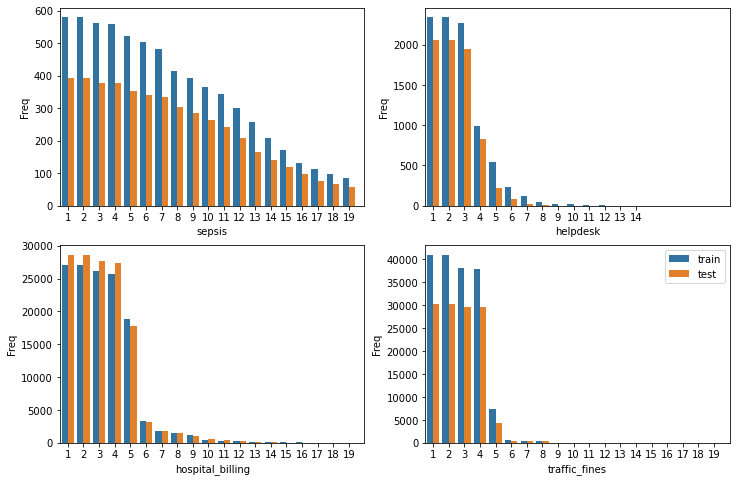

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#for file in files:
#    inf_train, inf_test, event_log, dataprep_settings = load_dataset("helpdesk") #color="yellowgreen"

sns.countplot(x=sepsis["prefix_number"], hue=sepsis["partition"], ax=ax[0,0])
sns.countplot(x=helpdesk["prefix_number"], hue=helpdesk["partition"], ax=ax[0,1])
sns.countplot(x=hospital_billing["prefix_number"], hue=hospital_billing["partition"], ax=ax[1,0])
sns.countplot(x=traffic_fines["prefix_number"], hue=traffic_fines["partition"], ax=ax[1,1])


ax[0,0].set(xlabel='sepsis', ylabel='Freq', xlim=[-0.5,19])
ax[0,0].legend([],[], frameon=False)
ax[0,1].set(xlabel='helpdesk', ylabel='Freq', xlim=[-0.5,19])
ax[0,1].legend([],[], frameon=False)
ax[1,0].set(xlabel='hospital_billing', ylabel='Freq', xlim=[-0.5,19])
ax[1,0].legend([],[], frameon=False)
ax[1,1].set(xlabel='traffic_fines', ylabel='Freq', xlim=[-0.5,19])
ax[1,1].legend(loc='upper right')

#plt.xlabel("Dataset")
#plt.ylabel("Frequency")
#plt.title("Trace distributions") # You can comment this line out if you don't need title

plt.legend(loc='upper right')

#fig.suptitle('Trace distribution')

plt.savefig("trace_dist_partitions.png", dpi=200, bbox_inches = "tight")

fig.show()